In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path

# load data
data = np.load("./heart_disease_data.npz") 

def ind_x_eq_val(x, val):
    return np.where(x==val)[0]

def count_x_eq_val(x, val):
    return len(ind_x_eq_val(x, val))/float(len(x))
    
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) / sig / np.sqrt(2 * np.pi)

### QUESTION (b) 
####  **Non-parametric model** Compute empirical pmf, derive the conditional pmf, and estimate the MAP decision by the mode of posterior distribution $p_{\tilde{h} \mid \tilde{s},\tilde{c}}$. (The MAP estimates should be $\tilde{h}=0 \text{ or } 1$)

In [2]:
# Estimate the pmf of H
P_H0 = count_x_eq_val(data["heart_disease"], 0)
P_H1 = count_x_eq_val(data["heart_disease"], 1)

# Estimate the conditional pmf of S given H
P_S_H0 = np.zeros(2)
P_S_H1 = np.zeros(2)
aux_sex_hd_0 = data["sex"][ind_x_eq_val(data["heart_disease"], 0)]
aux_sex_hd_1 = data["sex"][ind_x_eq_val(data["heart_disease"], 1)]
for ind_S in range(2):
    P_S_H0[ind_S] = count_x_eq_val(aux_sex_hd_0, ind_S) 
    P_S_H1[ind_S] = count_x_eq_val(aux_sex_hd_1, ind_S) 

# Estimate the conditional pmf of C given H
P_C_H0 = np.zeros(4)
P_C_H1 = np.zeros(4)
aux_c_hd_0 = data["chest_pain"][ind_x_eq_val(data["heart_disease"], 0)]
aux_c_hd_1 = data["chest_pain"][ind_x_eq_val(data["heart_disease"], 1)]
for ind_C in range(4):
    P_C_H0[ind_C] = count_x_eq_val(aux_c_hd_0, ind_C)
    P_C_H1[ind_C] = count_x_eq_val(aux_c_hd_1, ind_C)

# MAP estimate
MAP_estimate_S_C = (P_H1 * P_S_H1[data['sex_test'].astype(int)] * P_C_H1[data['chest_pain_test'].astype(int)]
                    > P_H0 * P_S_H0[data['sex_test'].astype(int)] * P_C_H0[data['chest_pain_test'].astype(int)]).astype(int)
error_rate_S_C = np.sum(np.abs( MAP_estimate_S_C - data['heart_disease_test'] )) / len(data['heart_disease_test'])

print("Probability of error " + str(error_rate_S_C))

Probability of error 0.18


### QUESTION (d)
#### **Maximum likelihood estimates** Find the parameters of two normal distributions ($\tilde{x}|\tilde{h}=1$ and $\tilde{x}|\tilde{h}=0$) that maximize the likelihood functions.

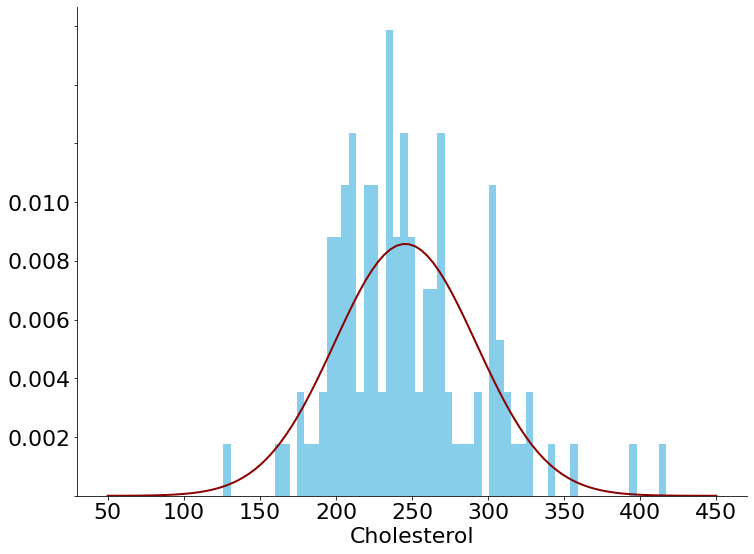

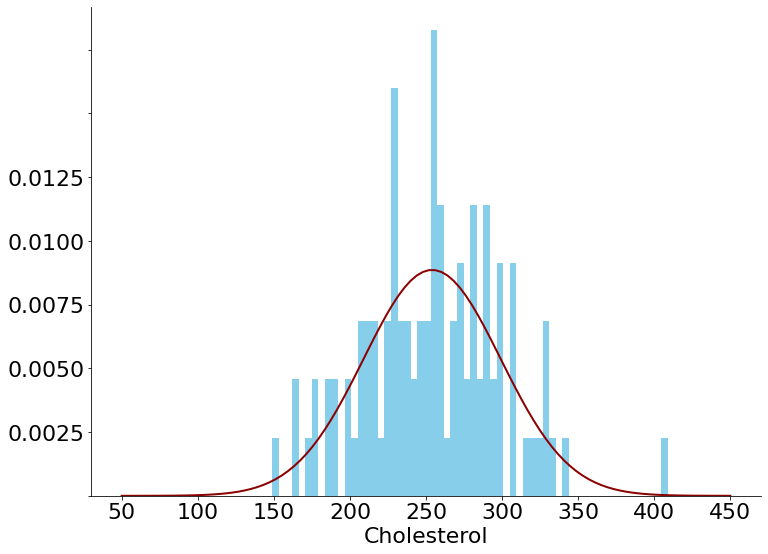

In [3]:
## Estimate conditional pdf of X given H
mean_X_H = np.zeros(2)
std_X_H = np.zeros(2)
mean_X_H[0]= np.mean(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 0)])
std_X_H[0] = np.std(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 0)])
mean_X_H[1]= np.mean(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 1)])
std_X_H[1] = np.std(data["cholesterol"][ind_x_eq_val(data["heart_disease"], 1)])

n_plot = 100
for i in range(2):
    plt.figure(figsize=(12, 9))  
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    yticks = ax.yaxis.get_major_ticks()
    yticks[0].label1.set_visible(False) 
    plt.xticks(fontsize=22) 
    plt.yticks(fontsize=22) 
    plt.xlabel("Cholesterol", fontsize=22)  
    plt.hist(data["cholesterol"][ind_x_eq_val(data["heart_disease"], i)],
             60,density=True, stacked=True,edgecolor = "none", color="skyblue")
    plt.plot(np.linspace(50, 450, n_plot),gaussian(np.linspace(50, 450, n_plot), 
                     mean_X_H[i], std_X_H[i]), color="darkred", lw=2)
    plt.savefig("plot_{}.pdf".format(i), bbox_inches='tight')

### QUESTION(e)

#### **MAP decision** compute posterior $p_{\tilde{h} \mid \tilde{s},\tilde{c}, \tilde{x}}$ and derive MAP

In [4]:
MAP_estimate_S_C_X = (P_H1 * P_S_H1[data['sex_test'].astype(int)] * P_C_H1[data['chest_pain_test'].astype(int)] 
                      * gaussian(data['cholesterol_test'], mean_X_H[1], std_X_H[1])
                      > P_H0 * P_S_H0[data['sex_test'].astype(int)] * P_C_H0[data['chest_pain_test'].astype(int)] 
                      * gaussian(data['cholesterol_test'], mean_X_H[0], std_X_H[0]))
error_rate_S_C_X = np.sum(np.abs( MAP_estimate_S_C_X - data['heart_disease_test'])) / len(data['heart_disease_test'])
print("Probability of error using cholesterol " + str(error_rate_S_C_X))

Probability of error using cholesterol 0.14
